# Data Understanding

Dataset yang digunakan dalam proyek ini adalah dataset "Laptop Price" yang diperoleh dari Kaggle. Anda dapat mengunduh dataset tersebut dari tautan berikut: [Dataset Harga Laptop](https://www.kaggle.com/datasets/muhammetvarl/laptop-price/data).

## Variables in the Laptop Price Dataset:

- **Company:** Produsen laptop.
- **Product:** Merek dan model laptop.
- **TypeName:** Jenis laptop (Notebook, Ultrabook, Gaming, dll.).
- **Inches:** Ukuran layar laptop.
- **ScreenResolution:** Resolusi layar laptop.
- **Cpu:**  Central Processing Unit (CPU) laptop.
- **Ram:** Random Access Memory (RAM) laptop.
- **Memory:** Memori Hard Disk Drive (HDD) atau Solid State Drive (SSD) laptop.
- **Gpu:** Graphics Processing Unit (GPU) laptop.
- **OpSys:** Sistem Operasi laptop.
- **Weight:** Berat laptop.
- **Price_euros:** Harga laptop dalam Euro.

# Prepare Dataset

## Download Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadalan","key":"3234178b0250039a2aa69d80d9d3cb4c"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Download dataset from kaggle
!kaggle datasets download -d muhammetvarl/laptop-price

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 38.2MB/s]


In [4]:
!unzip '/content/laptop-price.zip' -d '/content'

Archive:  /content/laptop-price.zip
  inflating: /content/laptop_price.csv  


## Import Library

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [6]:
data = pd.read_csv('/content/laptop_price.csv', sep=',', encoding='latin-1')
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Data Wrangling

## Data Assessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
data.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [9]:
data.shape

(1303, 13)

## Transforming Data

In [10]:
# Function to extract features related to screen resolution
def extract_features_resolution(resolution):
    retina = 1 if 'Retina' in resolution else 0
    ips = 1 if 'IPS' in resolution else 0
    touchscreen = 1 if 'Touchscreen' in resolution else 0
    quad = 1 if 'Quad' in resolution else 0
    resolution_val = resolution.split()[-1] if len(resolution.split()) > 1 else resolution
    return retina, ips, touchscreen, quad, resolution_val

# Function to extract CPU features
def extract_cpu_features(cpu):
    brand = cpu.split(' ')[0]
    processor_type = ' '.join(cpu.split(' ')[1:3])
    clock_speed = cpu.split()[-1][:-3]
    return brand, processor_type, clock_speed

# Function to extract features related to memory
def extract_features_memory(memory):
    size = memory.split()[0]
    type_memory = memory.split()[1]
    extra_memory = 1 if '+' in memory else 0
    return size, type_memory, extra_memory

# Extract features and create new columns for each features
data['retina'], data['ips'], data['touchscreen'], data['quad'], data['resolution'] = zip(*data['ScreenResolution'].map(extract_features_resolution))
data['cpu_name'], data['cpu_type'], data['cpu_speed'] = zip(*data['Cpu'].map(extract_cpu_features))
data['memory_size'], data['type_memory'], data['extra_memory'] = zip(*data['Memory'].map(extract_features_memory))
data['gpu_brand'] = data['Gpu'].str.split().str[0]

In [11]:
# Convert memory size to integer (in GB) and handle TB
data['memory_size'] = data['memory_size'].apply(lambda x: int(float(x.replace('TB', '000').replace('GB', ''))))
data['memory_size'] = data['memory_size'].replace(1, 1000)

# Convert data type to integer and float
data['Ram'] = data['Ram'].str.replace('GB', '').astype(int)
data['Weight'] = data['Weight'].str.replace('kg', '').astype(float)
data['cpu_speed'] = data['cpu_speed'].astype(float)

# Split resolution into width and height columns and convert them to integers
data[['width', 'height']] = data['resolution'].str.split('x', expand=True).astype(int)

In [12]:
# Drop unused columns
data.drop(columns=['laptop_ID', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'resolution'], inplace=True)

In [13]:
# Rename columns to lowercase
column = {'Company': 'company',
         'Product': 'product',
         'TypeName': 'type_name',
         'Inches': 'inches',
         'Ram': 'ram',
         'OpSys': 'opsys',
         'Weight': 'weight',
         'Price_euros': 'price'}

data.rename(columns=column, inplace=True)

## Data Cleaning

In [14]:
data.isna().sum()

company         0
product         0
type_name       0
inches          0
ram             0
opsys           0
weight          0
price           0
retina          0
ips             0
touchscreen     0
quad            0
cpu_name        0
cpu_type        0
cpu_speed       0
memory_size     0
type_memory     0
extra_memory    0
gpu_brand       0
width           0
height          0
dtype: int64

In [15]:
data.isnull().sum()

company         0
product         0
type_name       0
inches          0
ram             0
opsys           0
weight          0
price           0
retina          0
ips             0
touchscreen     0
quad            0
cpu_name        0
cpu_type        0
cpu_speed       0
memory_size     0
type_memory     0
extra_memory    0
gpu_brand       0
width           0
height          0
dtype: int64

In [16]:
data.duplicated().sum()

28

In [17]:
# Remove duplicate rows
data.drop_duplicates(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       1275 non-null   object 
 1   product       1275 non-null   object 
 2   type_name     1275 non-null   object 
 3   inches        1275 non-null   float64
 4   ram           1275 non-null   int64  
 5   opsys         1275 non-null   object 
 6   weight        1275 non-null   float64
 7   price         1275 non-null   float64
 8   retina        1275 non-null   int64  
 9   ips           1275 non-null   int64  
 10  touchscreen   1275 non-null   int64  
 11  quad          1275 non-null   int64  
 12  cpu_name      1275 non-null   object 
 13  cpu_type      1275 non-null   object 
 14  cpu_speed     1275 non-null   float64
 15  memory_size   1275 non-null   int64  
 16  type_memory   1275 non-null   object 
 17  extra_memory  1275 non-null   int64  
 18  gpu_brand     1275 non-null 

In [19]:
data.describe()

,inches,ram,weight,price,retina,ips,touchscreen,quad,cpu_speed,memory_size,extra_memory,width,height
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,0.013333,0.280000,0.147451,0.021961,2.302980,439.397647,0.163137,1900.043922,1073.904314
std,1.429470,5.097809,0.669196,700.752504,0.114743,0.449175,0.354694,0.146613,0.503846,355.746953,0.369636,493.346186,283.883940
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,0.900000,8.000000,0.000000,1366.000000,768.000000
25%,14.000000,4.000000,1.500000,609.000000,0.000000,0.000000,0.000000,0.000000,2.000000,256.000000,0.000000,1920.000000,1080.000000
50%,15.600000,8.000000,2.040000,989.000000,0.000000,0.000000,0.000000,0.000000,2.500000,256.000000,0.000000,1920.000000,1080.000000
75%,15.600000,8.000000,2.310000,1496.500000,0.000000,1.000000,0.000000,0.000000,2.700000,512.000000,0.000000,1920.000000,1080.000000
max,18.400000,64.000000,4.700000,6099.000000,1.000000,1.000000,1.000000,1.000000,3.600000,2000.000000,1.000000,3840.000000,2160.000000


In [20]:
data.skew()

<ipython-input-20-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


inches         -0.438622
ram             2.698716
weight          1.150804
price           1.511147
retina          8.496076
ips             0.981113
touchscreen     1.991028
quad            6.531349
cpu_speed      -0.838246
memory_size     1.573719
extra_memory    1.825537
width           2.210137
height          2.117949
dtype: float64

# EDA

## Univariate

In [21]:
# Define numeric and categorical features
numeric_features = ['inches', 'ram', 'weight', 'retina', 'ips', 'touchscreen', 'quad', 'cpu_speed', 'memory_size', 'extra_memory', 'width', 'height']
categorical_features = ['company', 'type_name', 'opsys', 'cpu_name', 'cpu_type', 'type_memory', 'gpu_brand']

company
           jumlah sampel  persentase
Dell                 291        22.8
Lenovo               289        22.7
HP                   268        21.0
Asus                 152        11.9
Acer                 101         7.9
MSI                   54         4.2
Toshiba               48         3.8
Apple                 21         1.6
Samsung                9         0.7
Razer                  7         0.5
Mediacom               7         0.5
Microsoft              6         0.5
Xiaomi                 4         0.3
Vero                   4         0.3
Chuwi                  3         0.2
Google                 3         0.2
Fujitsu                3         0.2
LG                     3         0.2
Huawei                 2         0.2 



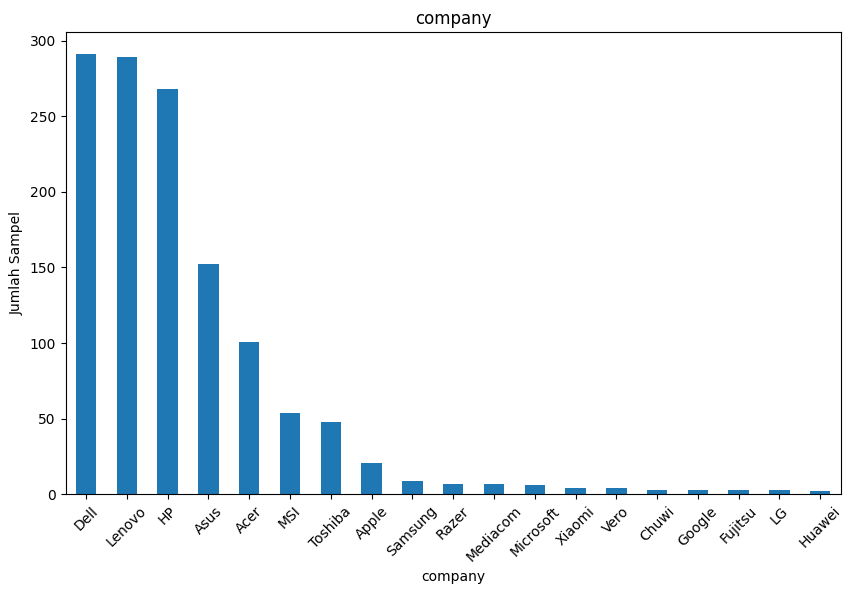



type_name
                    jumlah sampel  persentase
Notebook                      707        55.5
Gaming                        205        16.1
Ultrabook                     194        15.2
2 in 1 Convertible            117         9.2
Workstation                    29         2.3
Netbook                        23         1.8 



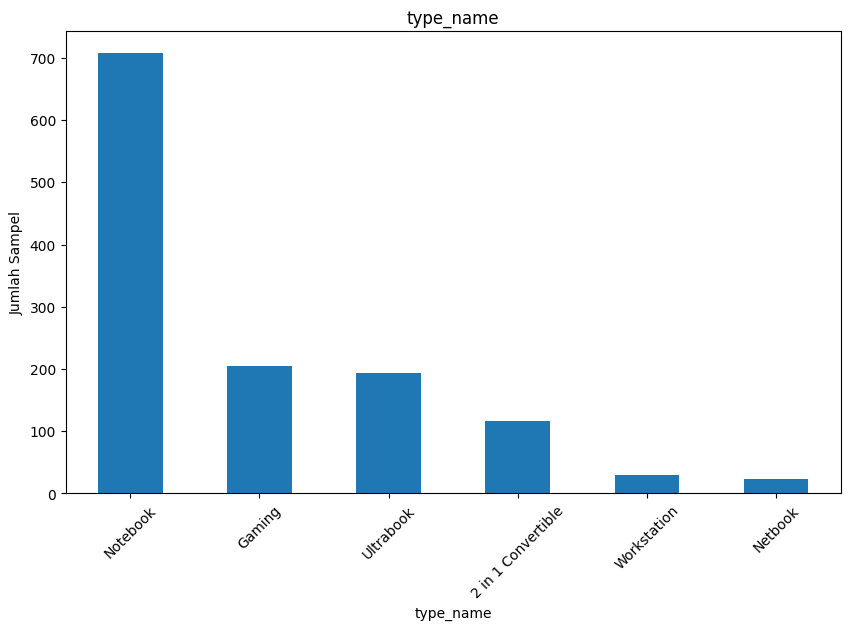



opsys
              jumlah sampel  persentase
Windows 10             1048        82.2
No OS                    66         5.2
Linux                    58         4.5
Windows 7                45         3.5
Chrome OS                27         2.1
macOS                    13         1.0
Mac OS X                  8         0.6
Windows 10 S              8         0.6
Android                   2         0.2 



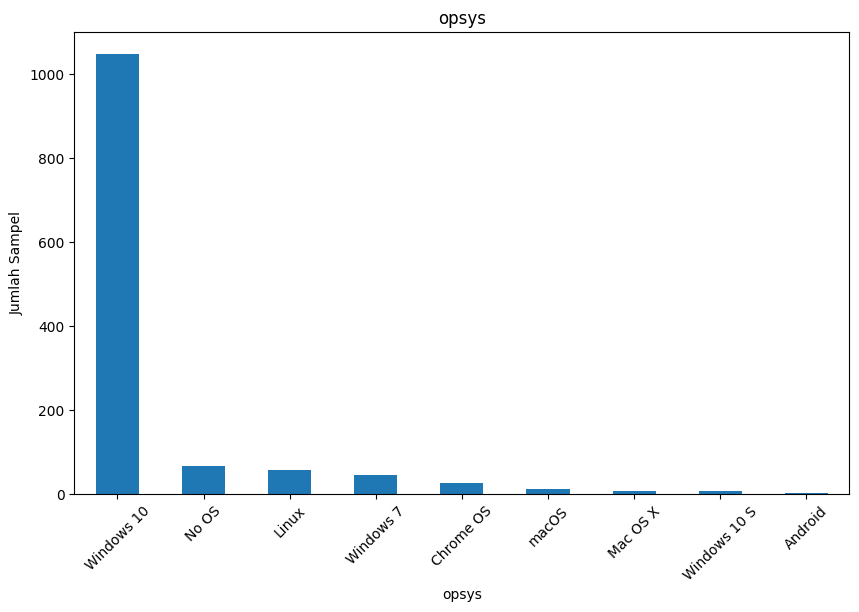



cpu_name
         jumlah sampel  persentase
Intel             1214        95.2
AMD                 60         4.7
Samsung              1         0.1 



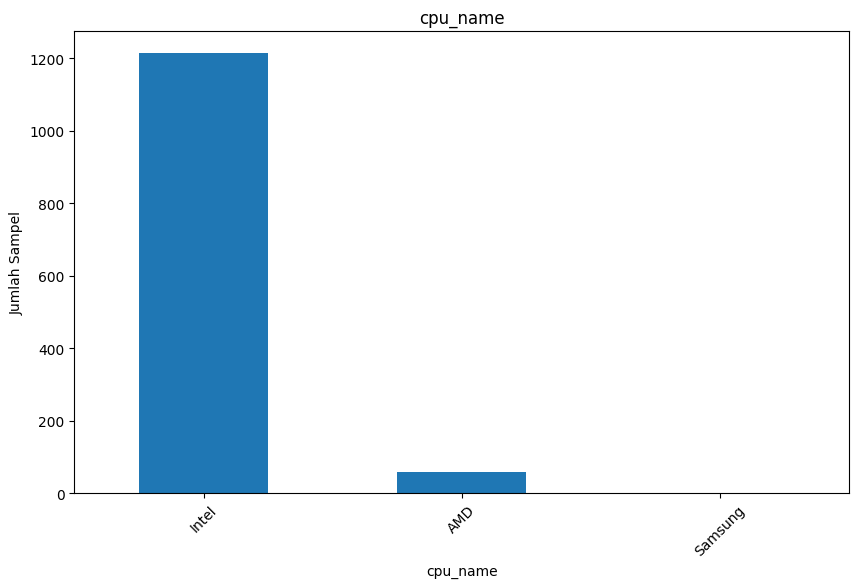



cpu_type
                      jumlah sampel  persentase
Core i7                         515        40.4
Core i5                         423        33.2
Core i3                         134        10.5
Celeron Dual                     70         5.5
Pentium Quad                     27         2.1
Core M                           17         1.3
A9-Series 9420                   12         0.9
A6-Series 9220                    8         0.6
Celeron Quad                      8         0.6
A12-Series 9720P                  7         0.5
Atom x5-Z8350                     5         0.4
Atom x5-Z8550                     4         0.3
A8-Series 7410                    4         0.3
Pentium Dual                      3         0.2
Ryzen 1700                        3         0.2
Atom X5-Z8350                     2         0.2
Xeon E3-1535M                     2         0.2
A9-Series A9-9420                 2         0.2
E-Series 7110                     2         0.2
A10-Series 9620P             

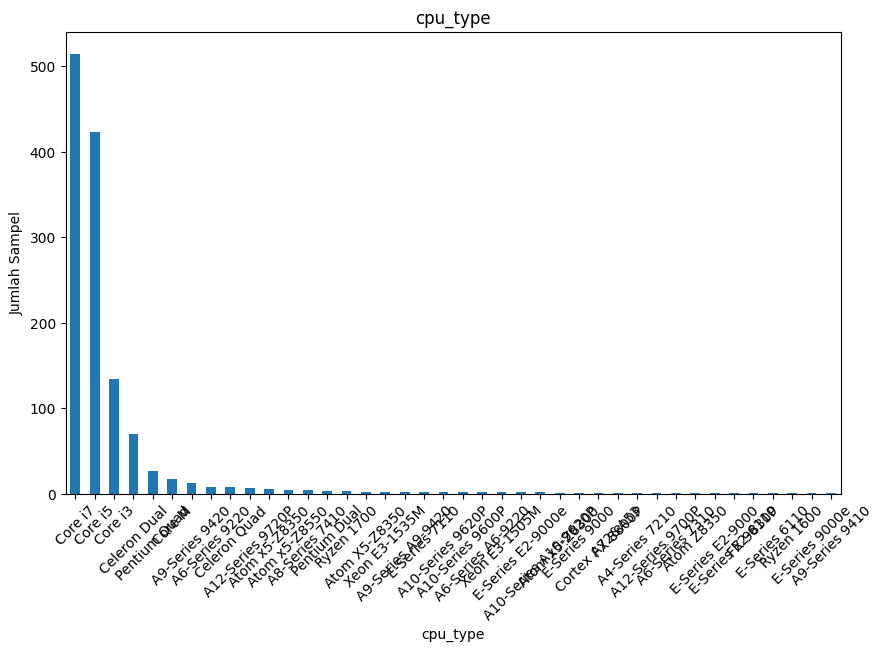



type_memory
        jumlah sampel  persentase
SSD               837        65.6
HDD               359        28.2
Flash              71         5.6
Hybrid              8         0.6 



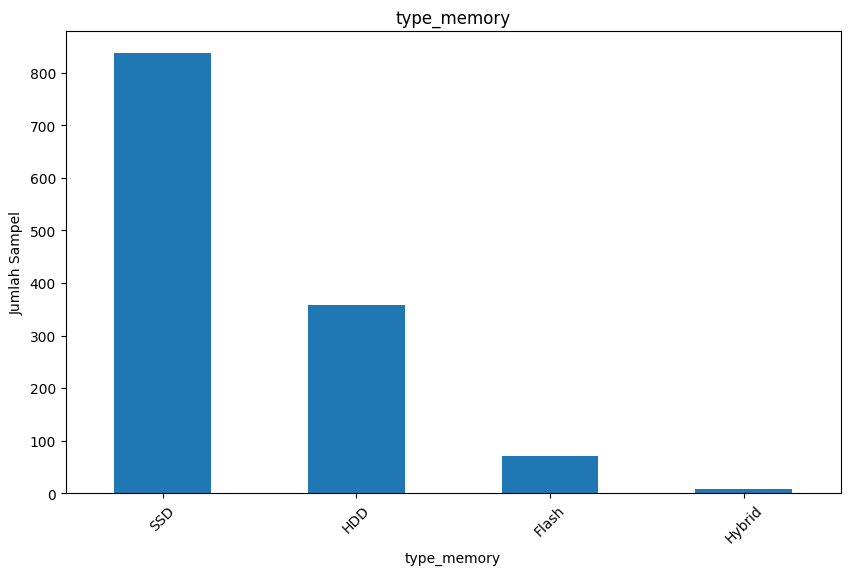



gpu_brand
        jumlah sampel  persentase
Intel             704        55.2
Nvidia            396        31.1
AMD               174        13.6
ARM                 1         0.1 



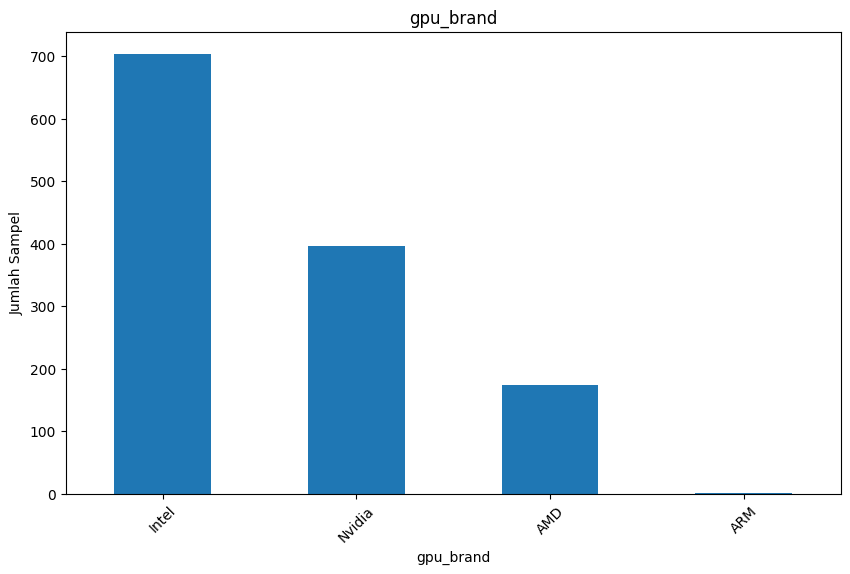

In [22]:
# Display distribution of categorial features
for feature in categorical_features:
    count = data[feature].value_counts()
    percent = 100*data[feature].value_counts(normalize=True)
    print(feature)
    df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
    print(df, '\n')

    plt.figure(figsize=(10, 6))
    count.plot(kind='bar', title=feature)
    plt.xlabel(feature)
    plt.ylabel('Jumlah Sampel')
    plt.xticks(rotation=45)
    plt.show()
    print('\n')

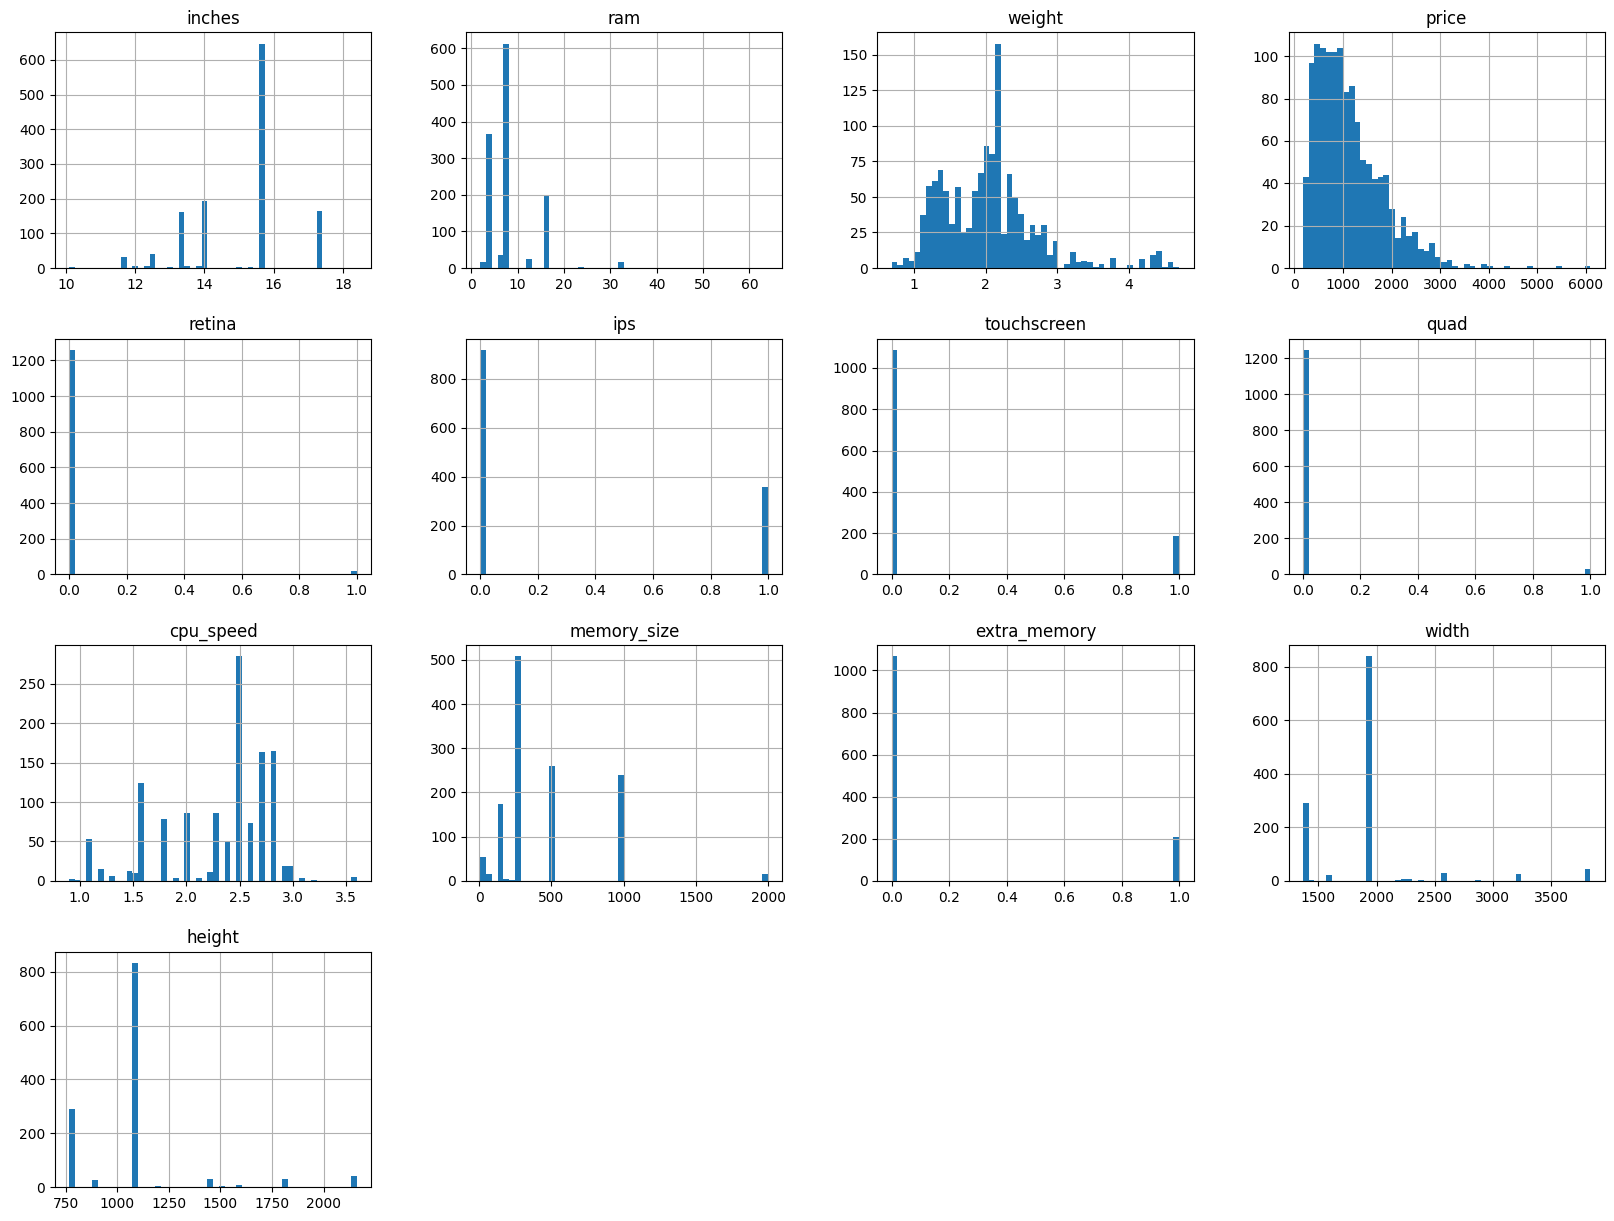

In [23]:
# Display histograms numeric features
data.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


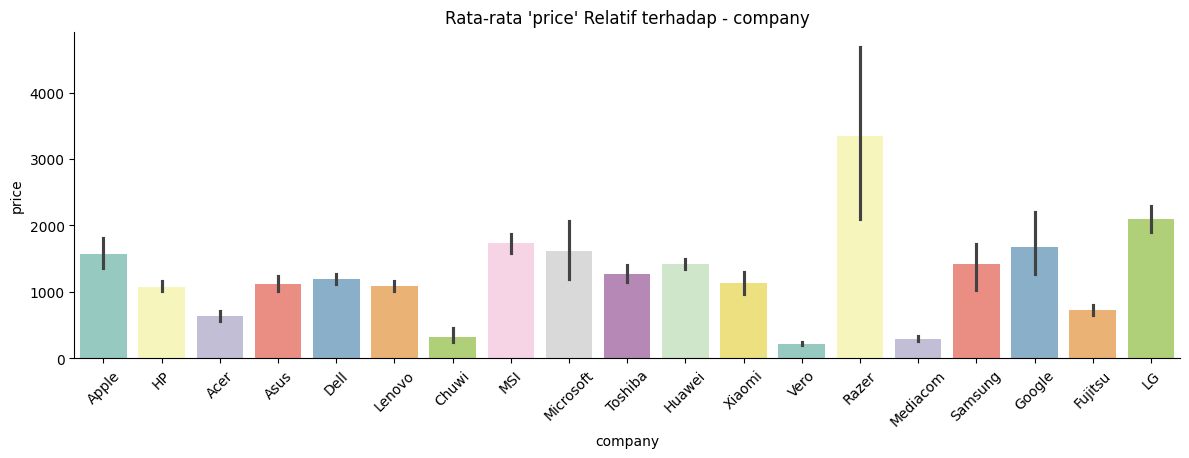

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


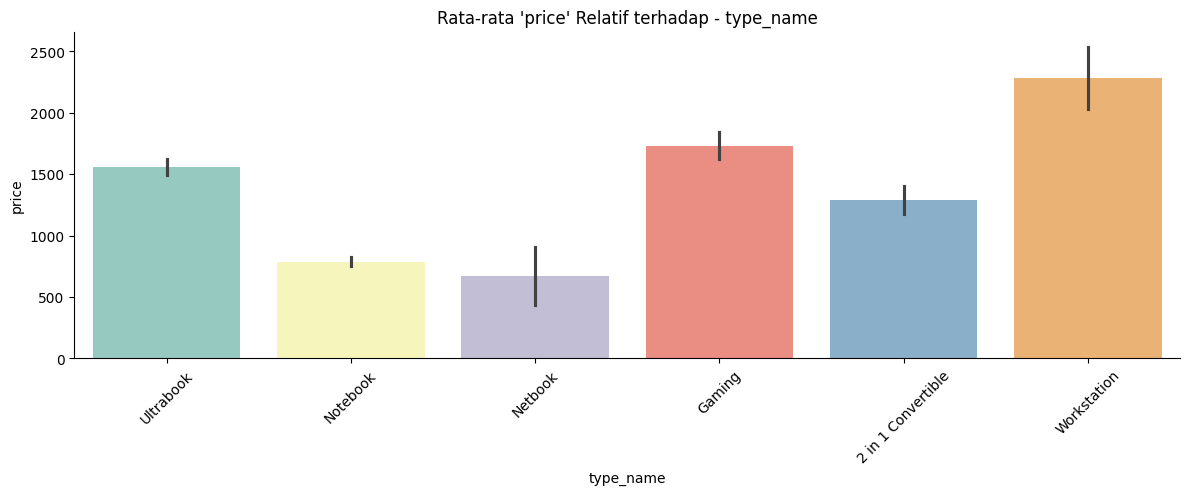

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


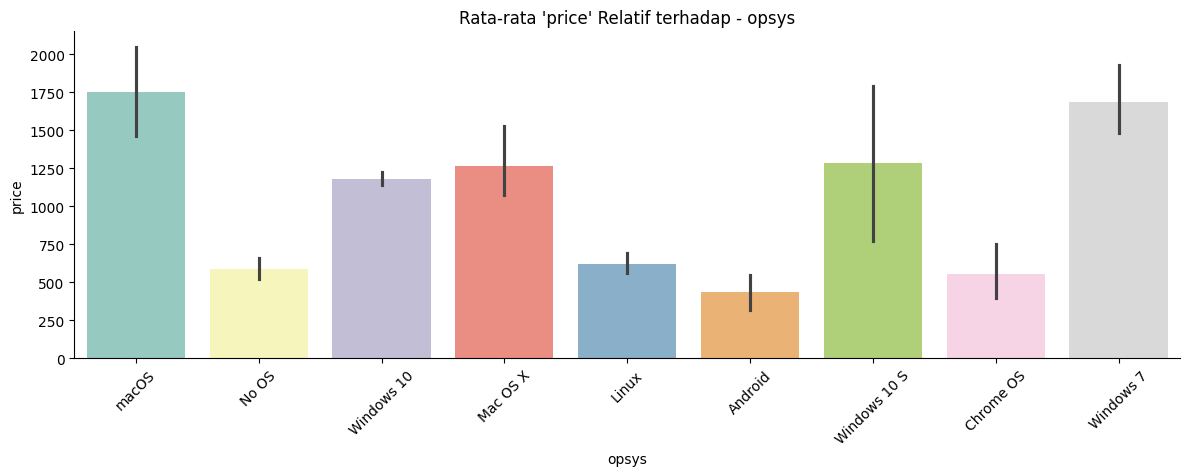

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


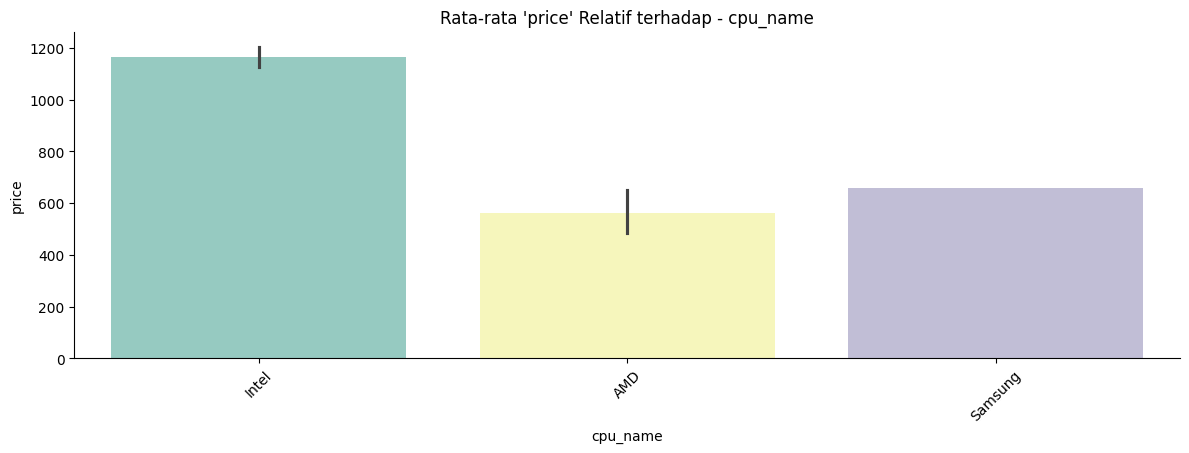

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


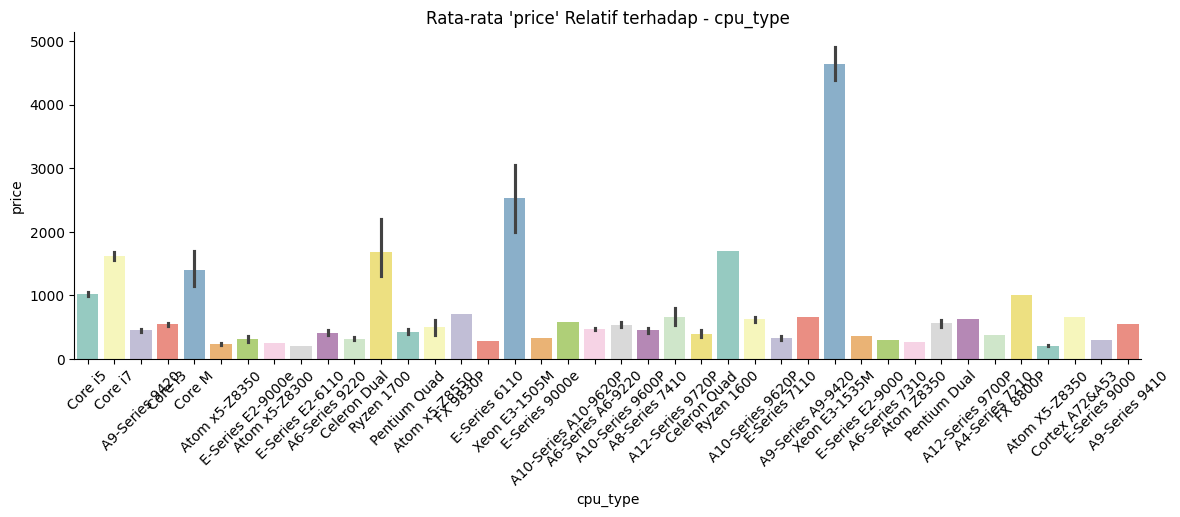

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


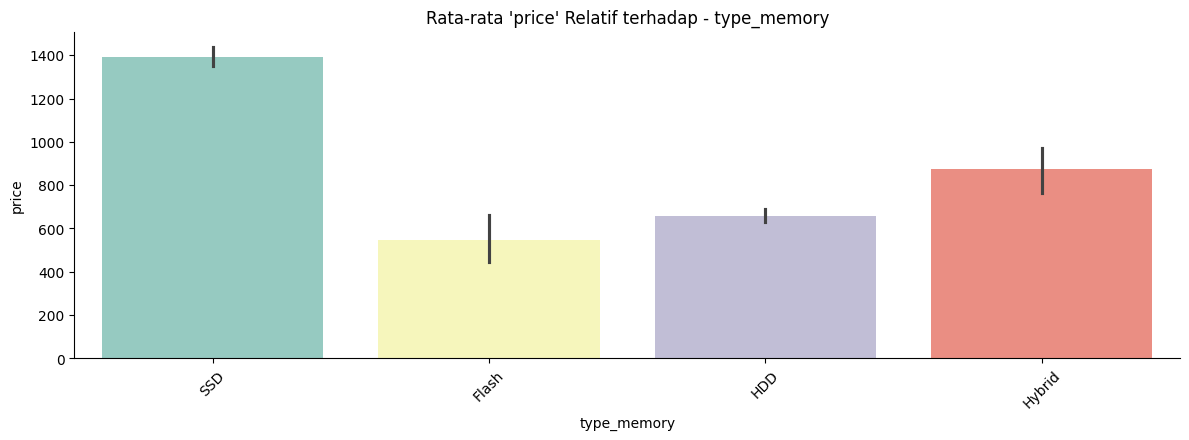

<ipython-input-24-6f8dda162b45>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")


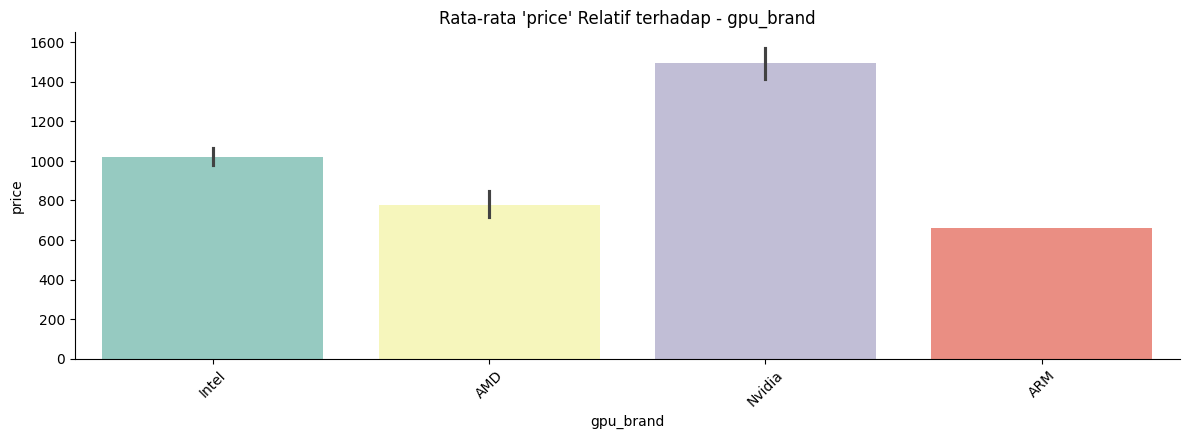

In [24]:
# Display distribution of categorial features on price labels
for col in categorical_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title(f"Rata-rata 'price' Relatif terhadap - {col}")
  plt.xticks(rotation=45)
  plt.show()

<Axes: >

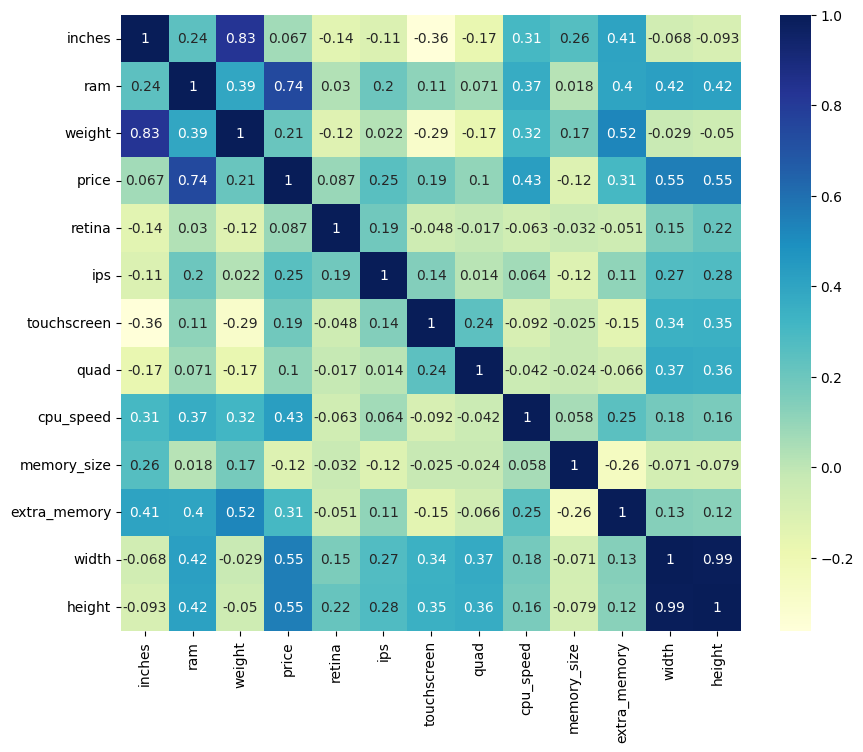

In [25]:
# Display correlation numeric features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot = True, cmap = "YlGnBu")

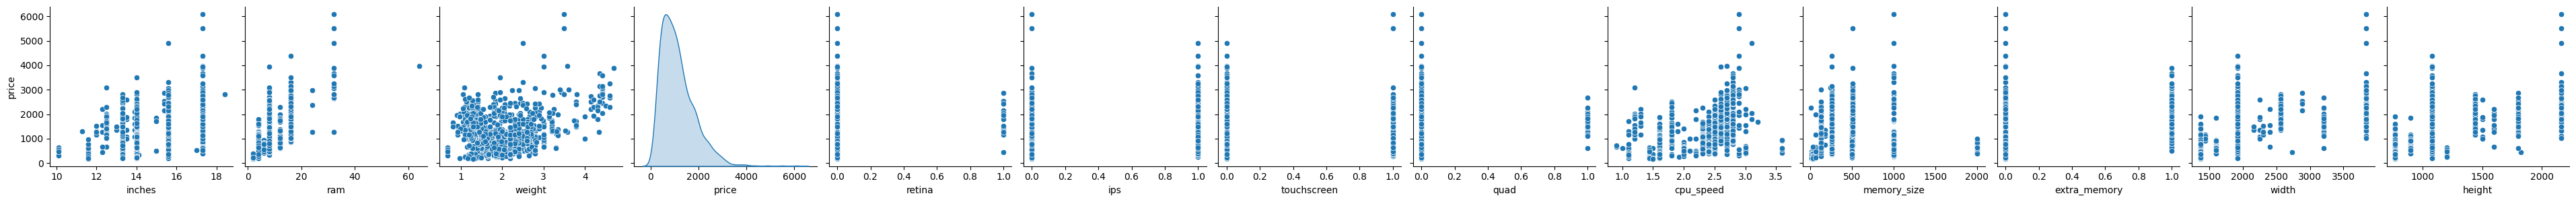

In [26]:
sns.pairplot(data, y_vars=['price'], diag_kind='kde', height=3)
plt.show()

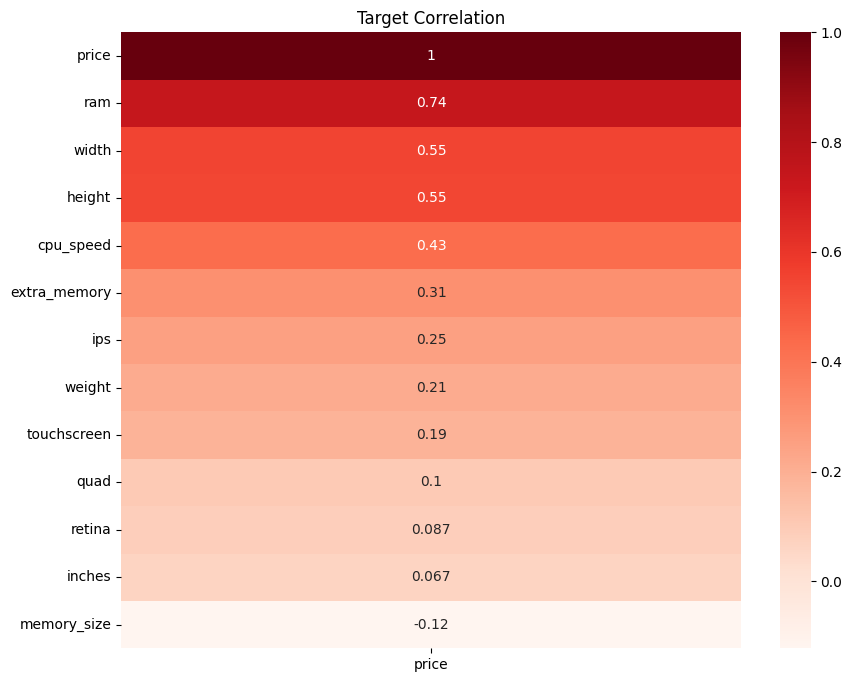

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot = True, cmap = 'Reds')
plt.title('Target Correlation')
plt.show()

In [28]:
# Drop columns with weak correlation to price labels
data.drop(columns=['product', 'cpu_type', 'quad', 'retina', 'inches'], inplace=True, axis=1)
data.head()

,company,type_name,ram,opsys,weight,price,ips,touchscreen,cpu_name,cpu_speed,memory_size,type_memory,extra_memory,gpu_brand,width,height
0,Apple,Ultrabook,8,macOS,1.37,1339.69,1,0,Intel,2.3,128,SSD,0,Intel,2560,1600
1,Apple,Ultrabook,8,macOS,1.34,898.94,0,0,Intel,1.8,128,Flash,0,Intel,1440,900
2,HP,Notebook,8,No OS,1.86,575.00,0,0,Intel,2.5,256,SSD,0,Intel,1920,1080
3,Apple,Ultrabook,16,macOS,1.83,2537.45,1,0,Intel,2.7,512,SSD,0,AMD,2880,1800
4,Apple,Ultrabook,8,macOS,1.37,1803.60,1,0,Intel,3.1,256,SSD,0,Intel,2560,1600


# Data Preparation

In [29]:
# Select columns with data type 'object'
categorical_column = data.select_dtypes(include=['object']).columns.tolist()
categorical_column

['company', 'type_name', 'opsys', 'cpu_name', 'type_memory', 'gpu_brand']

In [30]:
# Encode categorical features into binary
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(data[categorical_column])
data = pd.concat([data, pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_column))], axis=1)
data.drop(columns=categorical_column, inplace=True, axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


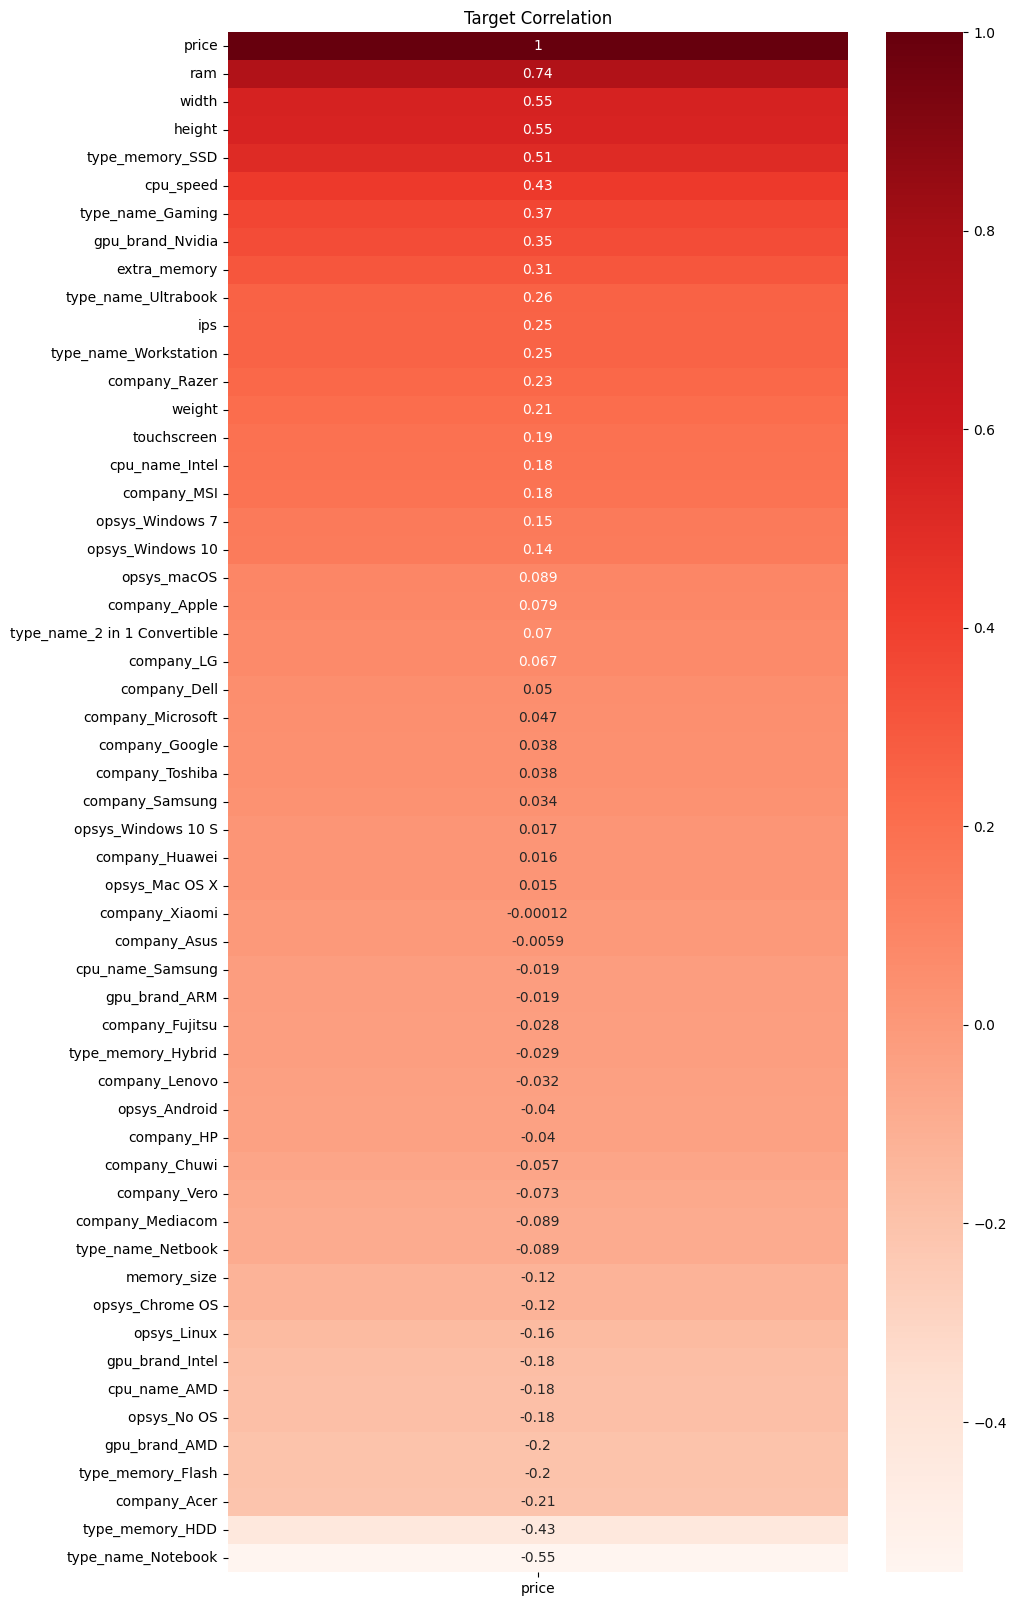

In [31]:
plt.figure(figsize = (10,20))
sns.heatmap(data.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), annot = True, cmap = 'Reds')
plt.title('Target Correlation')
plt.show()

In [32]:
# Remove features with correlation less than 0.1
correlation = data.corrwith(data['price'])
correlation = correlation[(correlation < -0.1) | (correlation > 0.1)]
correlation = correlation.sort_values(ascending=False)

data = data.filter(items=correlation.index)

In [33]:
# Split to train and test dataset
from sklearn.model_selection import train_test_split

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [35]:
# Create an empty DataFrame to store the mean squared error (MSE) for training and testing sets
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['LinearRegression', 'RandomForest', 'GradienBoosting', 'NeuralNetwork', 'SVM'])

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred = linear_reg.predict(X_train), y_true=y_train)

## Random Forest

In [37]:
# Selecting the RandomForestRegressor as an algorithm
from sklearn.ensemble import RandomForestRegressor

# Initialize a model
rf = RandomForestRegressor()

# Train the model with the scaled train dataset
rf.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = rf.predict(X_train), y_true=y_train)

## Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gradient_boosting = GradientBoostingRegressor()

# Train the model
gradient_boosting.fit(X_train, y_train)

models.loc['train_mse','GradienBoosting'] = mean_squared_error(y_pred = gradient_boosting.predict(X_train), y_true=y_train)

## Neural Network

In [39]:
import tensorflow as tf

# Build the neural network model
neural_network = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
neural_network.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
neural_network.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

models.loc['train_mse', 'NeuralNetwork'] = mean_squared_error(y_train, neural_network.predict(X_train))

Epoch 1/100
32/32 - 1s - loss: 1751419.3750 - 895ms/epoch - 28ms/step
Epoch 2/100
32/32 - 0s - loss: 1742176.7500 - 58ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 1723581.3750 - 56ms/epoch - 2ms/step
Epoch 4/100
32/32 - 0s - loss: 1685713.1250 - 52ms/epoch - 2ms/step
Epoch 5/100
32/32 - 0s - loss: 1614841.2500 - 55ms/epoch - 2ms/step
Epoch 6/100
32/32 - 0s - loss: 1498543.6250 - 64ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 1333798.3750 - 57ms/epoch - 2ms/step
Epoch 8/100
32/32 - 0s - loss: 1128103.6250 - 54ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 905222.3750 - 51ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 695861.6875 - 51ms/epoch - 2ms/step
Epoch 11/100
32/32 - 0s - loss: 522629.6250 - 50ms/epoch - 2ms/step
Epoch 12/100
32/32 - 0s - loss: 407614.0625 - 56ms/epoch - 2ms/step
Epoch 13/100
32/32 - 0s - loss: 336883.7812 - 57ms/epoch - 2ms/step
Epoch 14/100
32/32 - 0s - loss: 293769.5000 - 54ms/epoch - 2ms/step
Epoch 15/100
32/32 - 0s - loss: 264317.4375 - 5

## SVM

In [40]:
from sklearn.svm import SVR

# Initialize the model
svm_regressor = SVR(kernel='linear')

# Train the model
svm_regressor.fit(X_train, y_train)

models.loc['train_mse','SVM'] = mean_squared_error(y_pred = svm_regressor.predict(X_train), y_true=y_train)

# Evaluate

In [41]:
# Create a dictionary mapping model names to their corresponding models
mse = pd.DataFrame(columns=['train', 'test'], index=['LinearRegression', 'RandomForest', 'GradienBoosting', 'NeuralNetwork', 'SVM'])
model_dict = {'LinearRegression': linear_reg, 'RandomForest': rf, 'GradienBoosting': gradient_boosting, 'NeuralNetwork': neural_network, 'SVM': svm_regressor}

# Calculate MSE for each model on both training and testing sets and store the results in the 'mse' DataFrame
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

8/8 [==============================] - 0s 2ms/step


,train,test
LinearRegression,109.627112,121.214141
RandomForest,14.940847,77.940747
GradienBoosting,49.867538,71.240765
NeuralNetwork,87.187382,107.013905
SVM,137.865462,152.634134


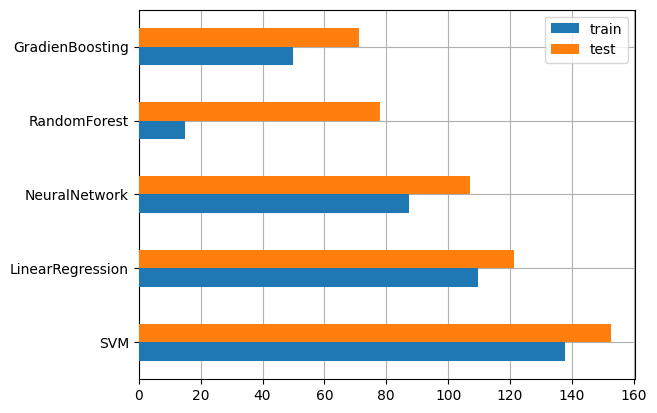

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

# Testing

In [43]:
import random

random_index = random.randint(0, len(X_test) - 1)
prediksi = pd.DataFrame(X_test[random_index:random_index + 1].copy())
true_value = y_test[random_index:random_index + 1]
pred_dict = {'y_true': true_value}
for name, model in model_dict.items():
    prediction = model.predict(prediksi).round(1)
    pred_dict['prediksi_' + name] = prediction.flatten()  # Ensure the prediction is one-dimensional

pd.DataFrame(pred_dict)

1/1 [==============================] - 0s 64ms/step


,y_true,prediksi_LinearRegression,prediksi_RandomForest,prediksi_GradienBoosting,prediksi_NeuralNetwork,prediksi_SVM
44,999.0,1349.4,950.9,972.8,658.799988,1123.9
